In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import tensorflow as tf
#import keras.backend.tensorflow_backend as KTF
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device,True)



In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="0000:68:00.0";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="1";  

In [3]:
import tensorflow as tf

In [4]:
keras.__version__

NameError: name 'keras' is not defined

In [5]:
tf.keras.__version__

'2.2.4-tf'

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow.keras.layers as layers
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Attention,Dense, Conv1D, Convolution2D, GRU, LSTM, Bidirectional, TimeDistributed,
                          Dropout, Flatten, LayerNormalization,RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import load_model
from sklearn import preprocessing
from tensorflow.keras.models import load_model
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn import linear_model
import pandas as pd
import torch
import torch.nn as nn
import random
#from keras import layers as layers
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from scipy import special
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
#from keras_self_attention import SeqSelfAttention

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.decomposition import NMF
from scipy import io
import numpy as np
import os
import os.path


In [180]:
def s_1(b1, b2, Vbot, C1, D1):
    s1 = (b1+b2)/2 + ((b2-b1)/2)*special.erfc((Vbot-C1)/D1)
    return s1
    
def s_2(b3, b4, Vbot, C2, D2):
    s2 = (b3+b4)/2 + ((b4-b3)/2)*special.erfc((Vbot-C2)/D2)
    return s2

def s_3(b5, b6, Vbot, C3, D3):
    s3 = (b5+b6)/2 + ((b6-b5)/2)*special.erfc((Vbot-C3)/D3)
    return s3

def s_4(b7, b8, Vtop, C4, D4):
    s4 = (b7+b8)/2 + ((b8-b7)/2)*special.erfc((Vtop-C4)/D4)
    return s4

def s_5(b9, b10, Vtop, C5, D5):
    s5 = (b9+b10)/2 + ((b10-b9)/2)*special.erfc((Vtop-C5)/D5)
    return s5

def s_6(b11, b12, Vtop, C6, D6):
    s6 = (b11+b12)/2 + ((b12-b11)/2)*special.erfc((Vtop-C6)/D6)
    return s6

In [181]:
def F_1(a1, a2, a3, a4, a7,Al1, Al2, Al3, s1, s2, s3, Vbot,x,y):
    F1 = a1+(a1-a2)*(special.erfc((Vbot+Al1)/s1)+1)/2 + x*(a2-a3)*(special.erfc((Vbot+Al2)/s2)+1)/2 + y*(a3-a4)*(special.erfc((Vbot+Al3)/s3)+1)/2 + a7*Vtop
    return F1

def F_2(a1, a5, a6, a4, a7, Au1, Au2, Au3, s4, s5, s6, Vtop,x,y):
    F2 = a1+(a1-a5)*(special.erfc((Vtop+Au1)/s4)+1)/2 + x*(a5-a6)*(special.erfc((Vtop+Au2)/s5)+1)/2 + y*(a6-a4)*(special.erfc((Vtop+Au3)/s6)+1)/2 + a7*Vtop
    return F2

In [182]:
Vbot = np.linspace(-15,15,96)
Vtop = np.linspace(-15,15,96)
a1 = -5
a2 = 3
a3 = 12
a4 = 15
a5 = 2
a6 = 10
a7 = 0.01
b1 = 1
b2 = 5
b3 = 1
b4 = 5
b5 = 1
b6 = 4
b7 = 1
b8 = 4
b9 = 1
b10= 4
b11= 1
b12= 4
Al1= 3
Al2= -2
Al3= -6
Au1= -8
Au2= -4
Au3= 0
C1 = -1
C2 = -1
C3 = -1
C4 = 6
C5 = 6
C6 = 6
D1 = 1
D2 = 1
D3 = 1
D4 = 1
D5 = 1
D6 = 1

In [183]:
s1 = s_1(b1, b2, Vbot, C1, D1)
s2 = s_2(b3, b4, Vbot, C2, D2)
s3 = s_3(b5, b6, Vbot, C3, D3)
s4 = s_4(b7, b8, Vtop, C4, D4)
s5 = s_5(b9, b10, Vtop, C5, D5)
s6 = s_6(b11, b12, Vtop, C6, D6)

In [184]:
F1 = F_1(a1, a2, a3, a4, a7, Al1, Al2, Al3, s1, s2, s3, Vbot)
F2 = F_2(a1, a5, a6, a4, a7, Au1, Au2, Au3, s4, s5, s6, Vtop)


TypeError: F_1() missing 2 required positional arguments: 'x' and 'y'

In [54]:
F1 = np.asarray(F1)
F2 = np.asarray(F2)
F4 = F2[0:47]
F3 = F2[48:95]
F5 = np.flip(F1)
F6 = np.concatenate((F3,F5,F4),axis=None)

In [55]:
F1.shape

(96,)

In [56]:
np.random.randint(2)

0

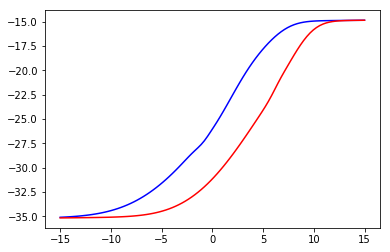

In [57]:
plt.plot(Vbot,F1,'b')
plt.plot(Vtop,F2,'r')

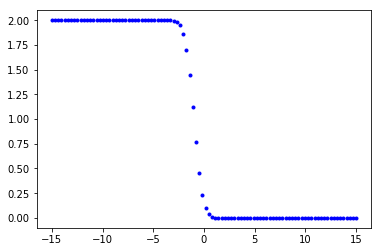

In [58]:
plt.plot(Vtop,special.erfc((Vbot-C1)/D1),'b.')

In [59]:
date = {'dfsa':100,'dfsad':200}

In [60]:
for key,value in date.items():
    print (key,value)

dfsa 100
dfsad 200


In [185]:
Vbot = np.linspace(-15,15,96)
Vtop = np.linspace(-15,15,96)

Fx = []
Fy = []

for k in range(1000):
    a1 = np.random.uniform(-6,-4,2)
    a2 = np.random.uniform(2,4,2)
    a3 = np.random.uniform(11,13,2)
    a4 = np.random.uniform(14,16,2)
    a5 = np.random.uniform(1,3,2)
    a6 = np.random.uniform(9,11,2)
    a7 = np.random.uniform(0,1,2)
    b1 = np.random.uniform(1, 1, 2)
    b2 = np.random.uniform(4, 6, 2)
    b3 = np.random.uniform(1, 1, 2)
    b4 = np.random.uniform(4, 6, 2)
    b5 = np.random.uniform(1, 1, 2)
    b6 = np.random.uniform(4, 6, 2)
    b7 = np.random.uniform(1, 1, 2)
    b8 = np.random.uniform(4, 6, 2)
    b9 = np.random.uniform(1, 1, 2)
    b10 = np.random.uniform(4, 6, 2)
    b11 = np.random.uniform(1, 1, 2)
    b12 = np.random.uniform(4, 6, 2)
    Al1= np.random.uniform(2,4,2)
    Al2= np.random.uniform(-3,-1,2)
    Al3= np.random.uniform(-7,-5,2)
    Au1= np.random.uniform(-9,-7,2)
    Au2= np.random.uniform(-5,-3,2)
    Au3= np.random.uniform(-1,1,2)
    C1 = np.random.uniform(-2,0,2)
    C2 = np.random.uniform(-2,0,2)
    C3 = np.random.uniform(-2,0,2)
    C4 = np.random.uniform(5,7,2)
    C5 = np.random.uniform(5,7,2)
    C6 = np.random.uniform(5,7,2)
    D1 = np.random.uniform(0,2,2)
    D2 = np.random.uniform(0,2,2)
    D3 = np.random.uniform(0,2,2)
    D4 = np.random.uniform(0,2,2)
    D5 = np.random.uniform(0,2,2)
    D6 = np.random.uniform(0,2,2)
    
    x = np.random.randint(2)
    y = np.random.randint(2)
    m = np.random.randint(2)
    n = np.random.randint(2)
    s1 = s_1(b1[0], b2[0], Vbot, C1[0], D1[0])
    s2 = s_2(b3[0], b4[0], Vbot, C2[0], D2[0])
    s3 = s_3(b5[0], b6[0], Vbot, C3[0], D3[0])
    s4 = s_4(b7[0], b8[0], Vtop, C4[0], D4[0])
    s5 = s_5(b9[0], b10[0], Vtop, C5[0], D5[0])
    s6 = s_6(b11[0], b12[0], Vtop, C6[0], D6[0])
    
    s11 = s_1(b1[1], b2[1], Vbot, C1[1], D1[1])
    s21 = s_2(b3[1], b4[1], Vbot, C2[1], D2[1])
    s31 = s_3(b5[1], b6[1], Vbot, C3[1], D3[1])
    s41 = s_4(b7[1], b8[1], Vtop, C4[1], D4[1])
    s51 = s_5(b9[1], b10[1], Vtop, C5[1], D5[1])
    s61 = s_6(b11[1], b12[1], Vtop, C6[1], D6[1])
    
    F1 = F_1(a1[0], a2[0], a3[0], a4[0], a7[0], Al1[0], Al2[0], Al3[0], s1, s2, s3, Vbot,x,y)
    F2 = F_2(a1[0], a5[0], a6[0], a4[0], a7[0], Au1[0], Au2[0], Au3[0], s4, s5, s6, Vtop,x,y)
    
    F11 = F_1(a1[1], a2[1], a3[1], a4[1], a7[1], Al1[1], Al2[1], Al3[1], s11, s21, s31, Vbot,m,n)
    F21 = F_2(a1[1], a5[1], a6[1], a4[1], a7[1], Au1[1], Au2[1], Au3[1], s41, s51, s61, Vtop,m,n)
    
    
    F1 = np.asarray(F1)
    F2 = np.asarray(F2)
    F4 = F2[0:48]
    F3 = F2[48:96]
    F5 = np.flip(F1)
    Fx_ = np.concatenate((F3,F5,F4),axis=None)
    Fx.append(Fx_)
    
    F11 = np.asarray(F11)
    F21 = np.asarray(F21)
    F41 = F21[0:48]
    F31 = F21[48:96]
    F51 = np.flip(F11)
    Fy_ = np.concatenate((F31,F51,F41),axis = None)
    Fy.append(Fy_)
    
    
    


In [67]:
def reshape_loop(F1,F2):
    F11 = np.asarray(F1)
    F21 = np.asarray(F2)
    F41 = F21[0:48]
    F31 = F21[48:96]
    F51 = np.flip(F11)
    Fy_ = np.concatenate((F31,F51,F41),axis = None)
    return Fy_

In [190]:
a = np.asarray(Fx)
b = np.atleast_3d(a)

In [196]:
c=b[900:1000]

In [197]:
c.shape

(100, 192, 1)

In [68]:
Fx = preprocessing.normalize(Fx)
Fx = np.asarray(Fx)
Fy = preprocessing.normalize(Fy)
Fy = np.asarray(Fy)
Fx.shape
Fx_3d = np.atleast_3d(Fx)
Fy_3d = np.atleast_3d(Fy)

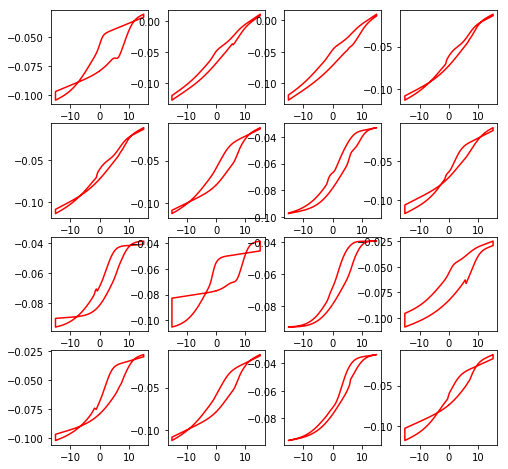

In [69]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs.reshape(-1)
for i in range (0,4):
    for j in range(0,4):
        k = np.random.randint(0, Fx.shape[0])
        ax = axs[i,j]
        ax.plot(reshape_loop(Vbot,Vtop),
                Fx_3d[k],'r-')
        
        

In [12]:
auto_test = load_model('resnet_pie_embedding')

In [13]:
result = auto_test.predict(Fx_3d)

f_y5 = Fx_3d
f_y6 = Fy_3d
f_fit = result

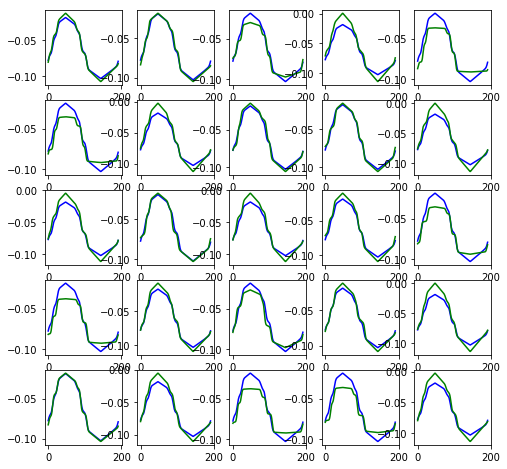

In [23]:
fig, axs = plt.subplots(5, 5, figsize=(8, 8))
axs.reshape(-1)
for i in range (0,5):
    for j in range(0,5):
        k = np.random.randint(0, f_y5.shape[0])
        ax = axs[i,j]
        #ax.plot(f_y5[k],'r-')
        ax.plot(f_fit[k],'b-')
        ax.plot(f_y6[k],'g-')

In [17]:
auto_test.evaluate()

ValueError: If evaluating from data tensors, you should specify the `steps` argument.

In [39]:
def encode_identity_block(X, stage, block, size, n_step, drop_frac, l2_norm):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'enconde' + str(stage) + block + '_branch'
    
    X_shortcut = X
    X = Attention()([X,X_shortcut])
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l2_norm)),input_shape=(n_step, 1))(X)
    
   # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l2_norm)),input_shape=(n_step, 1))(X)
    
   # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l2_norm)),input_shape=(n_step, 1))(X)
    
   # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2c')(X)
    
    X = layers.add([X, X_shortcut])
    X = LayerNormalization(axis=1 , center=True , scale=True)(X)
    X = layers.Activation('relu')(X)
    
    return X

In [40]:
def decode_identity_block(X, stage, block, size, n_step, drop_frac, l2_norm):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'decode' + str(stage) + block + '_branch'
    
    X_shortcut = X
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac, 
                                  activity_regularizer=l1(l2_norm)))(X)
    #X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac, 
                             activity_regularizer=l1(l2_norm)))(X)
    
    #X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac, 
                             activity_regularizer=l1(l2_norm)))(X)
    #X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2c')(X)
    
    X = layers.add([X, X_shortcut])
    X = LayerNormalization(axis=1 , center=True , scale=True)(X)
    X = layers.Activation('relu')(X)
    
    return X

In [47]:
def ResNet50(lr=3e-5, size=128, drop_frac=0, n_step=96, embedding = 16, l1_norm = 1e-5):

    X_input = layers.Input(shape=(n_step,1))
    X = X_input

    X = encode_identity_block(X, 2, 'b', size, n_step, drop_frac, l1_norm)
    X = encode_identity_block(X, 2, 'c', size, n_step, drop_frac, l1_norm)
    X = encode_identity_block(X, 2, 'd', size, n_step, drop_frac, l1_norm)

    X = layers.Bidirectional(LSTM(size, return_sequences=False, dropout=drop_frac,
                             activity_regularizer=l1(l1_norm)),input_shape=(n_step, 1))(X)
    #X = layers.BatchNormalization(axis=1, name='last_encode')(X)
    X = layers.Activation('relu')(X)
    X = layers.Dense(embedding,activation='relu',name='embedding_layer',activity_regularizer=l1(l1_norm))(X)
    X = layers.RepeatVector(n_step)(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac, 
                             activity_regularizer=l1(l1_norm)))(X)
    
    #X = layers.BatchNormalization(axis = 1, name = 'fires_decode')(X)
    X = layers.Activation('relu')(X)

    X = decode_identity_block(X, 2, 'b', size, n_step, drop_frac, l1_norm)
    X = decode_identity_block(X, 2, 'c', size, n_step, drop_frac, l1_norm)
    X = decode_identity_block(X, 2, 'd', size, n_step, drop_frac, l1_norm)
    
    X = layers.BatchNormalization(axis = 1, name = 'batch_normal')(X)
    X = layers.TimeDistributed(Dense(1, activation='linear'))(X)
    model = Model(inputs=X_input, outputs=X, name='ResNet50')
    model.compile(Adam(lr), loss='mse')

    return model

In [48]:
tensorflow.keras.__version__

'2.2.4-tf'

In [49]:
Try  = ResNet50()

In [50]:
Try.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 96, 1)]      0                                            
__________________________________________________________________________________________________
attention_9 (Attention)         (None, 96, 1)        0           input_4[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
bidirectional_40 (Bidirectional (None, 96, 256)      133120      attention_9[0][0]                
__________________________________________________________________________________________________
activation_40 (Activation)      (None, 96, 256)      0           bidirectional_40[0][0]    

In [16]:
cd Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks/

[Errno 2] No such file or directory: 'Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks/'
/Users/qinshuyu/497_MAT_Assignment/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks


In [17]:
import warnings
warnings.filterwarnings('ignore')
import imp
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import codes.analysis.rnn as rnn
import codes.util as util
import codes.analysis.machine_learning as ml
import codes.analysis as an
import codes.processing as p
import codes.viz as viz
import codes.util.input_output as io_transfer

In [18]:
imported = {'data': io.matlab.loadmat('./Raw_Data/Data.mat'),
            'validation_data': io.matlab.loadmat('Raw_Data/loop_1.mat')}

# extracts the important information from the raw data
raw = {'voltage': imported['data']['Voltagedata_mixed'],
       'piezoresponse': imported['data']['Loopdata_mixed'],
       'amplitude': imported['data']['OutA2_mixed'],
       'phase': imported['data']['OutPhi1_mixed'],
       'resonance': imported['data']['Outw2_mixed'],
       'quality_factor': imported['data']['OutQ2_mixed'],
       'val_piezoresponse': imported['validation_data']['piezo_1'],
       'val_resonance': imported['validation_data']['resonance_loop_1']}

In [19]:
p.filters.range_filter(raw['resonance'], [1300, 1340])
p.filters.range_filter(raw['val_resonance'], [1300, 1340])

# interpolates data that is non-real. This happens when the SHO fit fails
interpolated = {'voltage': raw['voltage'],
                'piezoresponse': p.filters.clean_interpolate(raw['piezoresponse'],
                                                             'linear').reshape(-1, raw['piezoresponse'].shape[2]),
                'amplitude': p.filters.clean_interpolate(raw['amplitude'],
                                                         'linear').reshape(-1, raw['amplitude'].shape[2]),
                'phase': p.filters.clean_interpolate(raw['phase'],
                                                     'linear').reshape(-1, raw['phase'].shape[2]),
                'resonance': p.filters.clean_interpolate(raw['resonance'],
                                                         'linear').reshape(-1, raw['resonance'].shape[2]),
                'quality_factor': p.filters.clean_interpolate(raw['quality_factor'],
                                                              'linear').reshape(-1, raw['quality_factor'].shape[2]),
                'val_piezoresponse': p.filters.clean_interpolate(raw['val_piezoresponse'],
                                                                  'linear').reshape(-1, raw['val_piezoresponse'].shape[2]),
                'val_resonance': p.filters.clean_interpolate(raw['val_resonance'],
                                                             'linear').reshape(-1, raw['val_resonance'].shape[2])}
# Uses Savitzky-Golay filter to remove outlier points
sg_filtered = {'voltage': raw['voltage'],
               'piezoresponse': p.filters.savgol(interpolated['piezoresponse'], fit_type='linear'),
               'amplitude': p.filters.savgol(interpolated['amplitude'], fit_type='linear'),
               'phase': p.filters.savgol(interpolated['phase'], fit_type='linear'),
               'resonance': p.filters.savgol(interpolated['resonance'], fit_type='linear'),
               'quality_factor': p.filters.savgol(interpolated['quality_factor'], fit_type='linear'),
               'val_piezoresponse': p.filters.savgol(interpolated['val_piezoresponse'], fit_type='linear'),
               'val_resonance': p.filters.savgol(interpolated['val_resonance'], fit_type='linear')}

# normalized the data. This is important for training Neural Networks
normalized = {'voltage': raw['voltage'],
              'piezoresponse': p.filters.normalize(sg_filtered['piezoresponse']),
              'amplitude': p.filters.normalize(sg_filtered['amplitude']),
              'phase': p.filters.normalize(sg_filtered['phase']),
              'resonance': p.filters.normalize(sg_filtered['resonance']),
              'quality_factor': p.filters.normalize(sg_filtered['quality_factor']),
              'val_piezoresponse': p.filters.normalize(sg_filtered['val_piezoresponse'],
                                                       sg_filtered['piezoresponse']),
              'val_resonance': p.filters.normalize(sg_filtered['val_resonance'],
                                                   sg_filtered['resonance'])}

In [20]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.4.1
numpy: 1.17.2
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.22.1


In [21]:
X = np.atleast_3d(normalized['piezoresponse'])
Y = np.atleast_3d(normalized['val_piezoresponse'])

In [10]:
V = normalized['voltage']

In [12]:
V.shape

(96, 1)

In [13]:
np.save('voltage',V)

In [67]:
model_new = load_model('resnet_jagar_data_16_with_weights')

In [66]:
weights  = np.asarray(model_new.get_weights())
weights.shape

(128,)

In [54]:
model_new.get_weights()[0]

array([[-1.89506501e-01,  7.85115117e-04, -2.59132516e-02,
         5.39668612e-02, -1.63469121e-01, -2.61424016e-02,
         1.94856673e-01,  1.60671443e-01,  5.94876692e-05,
         1.45812958e-01,  2.37624068e-02, -2.06277929e-02,
        -3.59190702e-02, -1.68585032e-01, -4.33607865e-03,
         1.39704654e-02, -1.02416545e-01, -5.43329157e-02,
        -8.66243020e-02, -8.41051266e-02,  1.06001206e-01,
         1.72202051e-01,  4.73620221e-02,  9.94457230e-02,
        -8.53584856e-02,  6.20178021e-02,  6.74733743e-02,
         9.11067948e-02, -1.65296167e-01,  8.81151762e-04,
        -4.52008918e-02, -2.84053218e-02,  1.18687950e-01,
        -9.34590250e-02,  8.83383900e-02, -9.87942591e-02,
         2.12219302e-02, -1.07628614e-01, -1.46913946e-01,
        -9.14525762e-02, -5.68125732e-02,  7.92379752e-02,
         3.56383957e-02, -1.20176375e-01, -6.24020696e-02,
        -2.66790725e-02, -9.65422764e-02, -1.16931319e-01,
        -4.80300225e-02, -1.30940929e-01, -6.18803911e-0

In [68]:
result = model_new.predict(X)

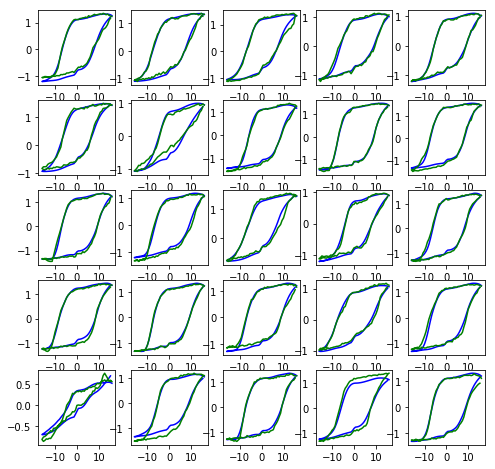

In [70]:
f_y5 = X
f_y6 = Y
f_fit = result

fig, axs = plt.subplots(5, 5, figsize=(8, 8))
axs.reshape(-1)
for i in range (0,5):
    for j in range(0,5):
        k = np.random.randint(0, f_y5.shape[0])
        ax = axs[i,j]
        #ax.plot(f_y5[k],'r-')
        ax.plot(normalized['voltage'],f_fit[k],'b-')
        ax.plot(normalized['voltage'],f_y6[k],'g-')

In [78]:
model_new1 = load_model('resnet_jagar_data_16_with_weights_1')

In [89]:
model_new1.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 96, 1)]      0                                            
__________________________________________________________________________________________________
bidirectional_181 (Bidirectiona (None, 96, 256)      133120      input_10[0][0]                   
__________________________________________________________________________________________________
activation_181 (Activation)     (None, 96, 256)      0           bidirectional_181[0][0]          
__________________________________________________________________________________________________
bidirectional_182 (Bidirectiona (None, 96, 256)      394240      activation_181[0][0]             
___________________________________________________________________________________________

In [79]:
result = model_new1.predict(X)

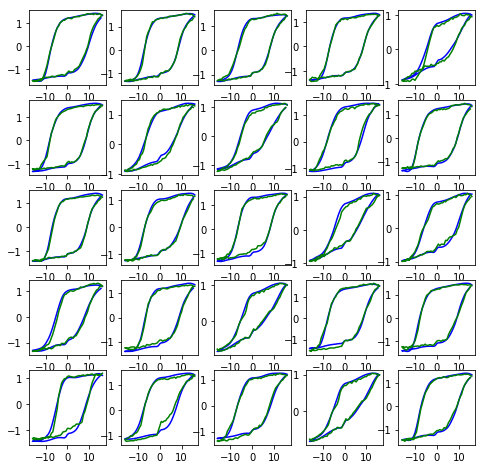

In [84]:
f_y5 = X
f_y6 = Y
f_fit = result

fig, axs = plt.subplots(5, 5, figsize=(8, 8))
axs.reshape(-1)
for i in range (0,5):
    for j in range(0,5):
        k = np.random.randint(0, f_y5.shape[0])
        ax = axs[i,j]
        #ax.plot(f_y5[k],'r-')
        ax.plot(normalized['voltage'],f_fit[k],'b-')
        ax.plot(normalized['voltage'],f_y6[k],'g-')

In [114]:
model_new2 = load_model('resnet_jagar_data_16_with_weights_2')

In [115]:
result = model_new2.predict(X)

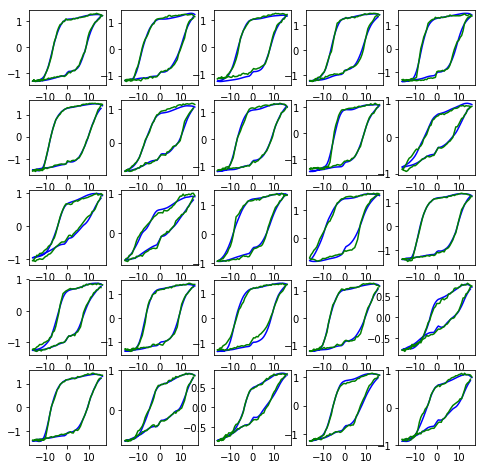

In [119]:
f_y5 = X
f_y6 = Y
f_fit = result

fig, axs = plt.subplots(5, 5, figsize=(8, 8))
axs.reshape(-1)
for i in range (0,5):
    for j in range(0,5):
        k = np.random.randint(0, f_y5.shape[0])
        ax = axs[i,j]
        #ax.plot(f_y5[k],'r-')
        ax.plot(normalized['voltage'],f_fit[k],'b-')
        ax.plot(normalized['voltage'],f_y6[k],'g-')

In [135]:
model_new3 = load_model('resnet_jagar_data_16_with_weights_3')

In [136]:
result = model_new3.predict(X)

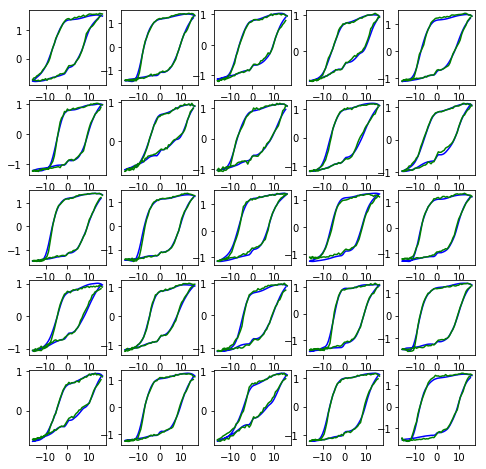

In [139]:
f_y5 = X
f_y6 = Y
f_fit = result

fig, axs = plt.subplots(5, 5, figsize=(8, 8))
axs.reshape(-1)
for i in range (0,5):
    for j in range(0,5):
        k = np.random.randint(0, f_y5.shape[0])
        ax = axs[i,j]
        #ax.plot(f_y5[k],'r-')
        ax.plot(normalized['voltage'],f_fit[k],'b-')
        ax.plot(normalized['voltage'],f_y6[k],'g-')

In [22]:
# builds folders where the data will be saved
folder_structure = util.file.make_folder(
    './structure')
folder_BE = util.file.make_folder(
    './Band_Excitation')
folder_BE_Movie_files = util.file.make_folder(
    folder_BE + '/BE_Movie_Files')
folder_BE_all_images = util.file.make_folder(
    folder_BE + '/BE_all_images')
folder_BE_spectra = util.file.make_folder(
    folder_BE + '/BE_spectra')
folder_BE_cleaned_spectra = util.file.make_folder(
    folder_BE + '/cleaned_spectra')
folder_pca = util.file.make_folder(
    './pca')
folder_nmf = util.file.make_folder(
    './nmf')
folder_clustering = util.file.make_folder('./clustering')
folder_pca_clustering = util.file.make_folder(
    './pca_clustering')
folder_piezoresponse_autoencoder = util.file.make_folder(
    './piezoresponse_autoencoder')
folder_resonance_autoencoder = util.file.make_folder(
    './resonance_autoencoder')
folder_piezoresponse_autoencoder_movie = util.file.make_folder(
    folder_piezoresponse_autoencoder + '/movie')
folder_piezoresponse_autoencoder_training_movie = util.file.make_folder(
    folder_piezoresponse_autoencoder + '/training_movie')
folder_resonance_autoencoder_movie = util.file.make_folder(
    folder_resonance_autoencoder + '/movie')
folder_resonance_autoencoder_training_movie = util.file.make_folder(
    folder_resonance_autoencoder + '/training_movie')
folder_phase_field = util.file.make_folder(
    './Phase_Field')

In [23]:
plot_format = {
    # adds scalebar to image
    'add_scalebar': True,
    # sets the dimensions for the scalebar [(size of image),(size of scalebar)]
    'scalebar': [2000, 500],
    # selects if the image will be rotated
    'rotation': True,
    # selects the rotation angle of the image
    'angle': 60.46,
    # sets the fraction of the image to crop
    'frac_rm': 0.17765042979942694,
    # sets the resolution of the image
    'dpi': 300,
    # sets the default colormap
    'color_map': 'viridis',
    # sets if color bars should be added
    'color_bars': True}

In [25]:
piezoresponse_model = load_model('resnet_jagar_data_16_with_weights_4_XX_1.h5')

In [102]:
from keras.datasets import mnist
import numpy as np


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train_3d = np.atleast_3d(x_train)
x_test_3d = np.atleast_3d(x_test)

In [103]:
from keras.datasets import mnist
import numpy as np
from sklearn.preprocessing import StandardScaler
(x_train, y_train), (x_test, y_test) = mnist.load_data()
scaler = StandardScaler()

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

x_train = scaler.fit_transform(x_train.astype('float32')) 
x_test = scaler.transform(x_test.astype('float32'))


In [30]:
piezoresponse_model = load_model('conv_attention_l1_1e_3_30000.h5')

In [31]:
piezoresponse_embeddings = rnn.get_activations(piezoresponse_model,
                                               normalized['piezoresponse'],
                                               13)

In [122]:
piezoresponse_embeddings.shape

(3600, 24)

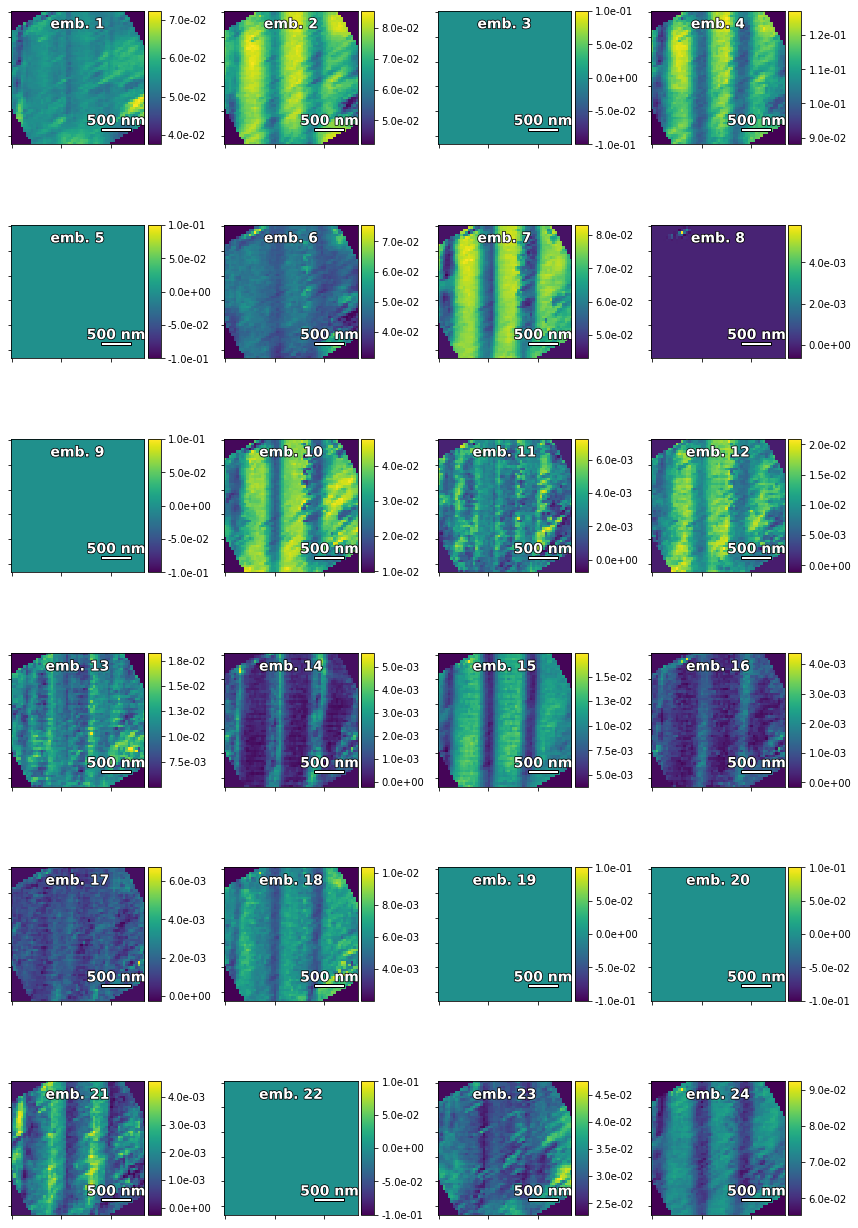

In [32]:
_ = viz.plot.embedding_maps(piezoresponse_embeddings,
                            printing,
                            plot_format,
                            folder_piezoresponse_autoencoder,
                            filename='./30000epoch_lr=1e-3')

In [28]:
piezoresponse_embeddings.shape

(10000, 16)

In [94]:
import umap
reducer = umap.UMAP(random_state=42)
reducer.fit(piezoresponse_embeddings)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=42,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [96]:
embedding = reducer.transform(piezoresponse_embeddings)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(10000, 2)

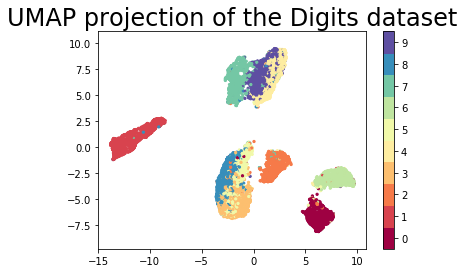

In [33]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_test, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [34]:
result = piezoresponse_model.predict(X)

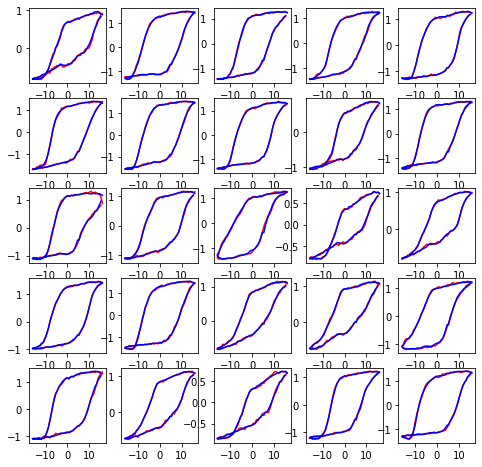

In [35]:
f_y5 = X
f_y6 = Y
f_fit = result

fig, axs = plt.subplots(5, 5, figsize=(8, 8))
axs.reshape(-1)
for i in range (0,5):
    for j in range(0,5):
        k = np.random.randint(0, f_y5.shape[0])
        ax = axs[i,j]
        ax.plot(normalized['voltage'],f_y5[k],'r-')
        ax.plot(normalized['voltage'],f_fit[k],'b-')
       # ax.plot(normalized['voltage'],f_y6[k],'g-')

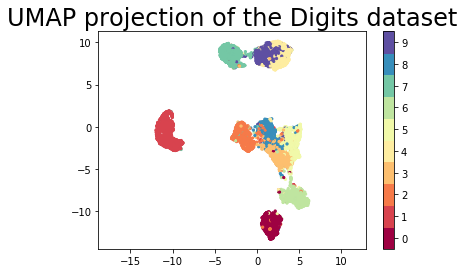

In [97]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_test, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [46]:
x_test_f = []

In [48]:
for i in range(len(x_test)):
    # display original
    x_test_f_ = x_test_3d[i].reshape(28, 28)
    x_test_f.append(x_test_f_)

In [99]:
x_test_f1=x_test_f[0:1000]
tx1 = tx[0:1000]
ty1 = ty[0:1000]
tx1 = (tx1-np.min(tx1)) / (np.max(tx1) - np.min(tx1))
ty1 = (ty1-np.min(ty1)) / (np.max(ty1) - np.min(ty1))

In [50]:
x_test_f = np.asarray(x_test_f)

In [52]:
x_test_f[0].shape

(28, 28)

In [98]:
tx, ty = embedding[:,0], embedding[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

In [3]:
%matplotlib inline
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

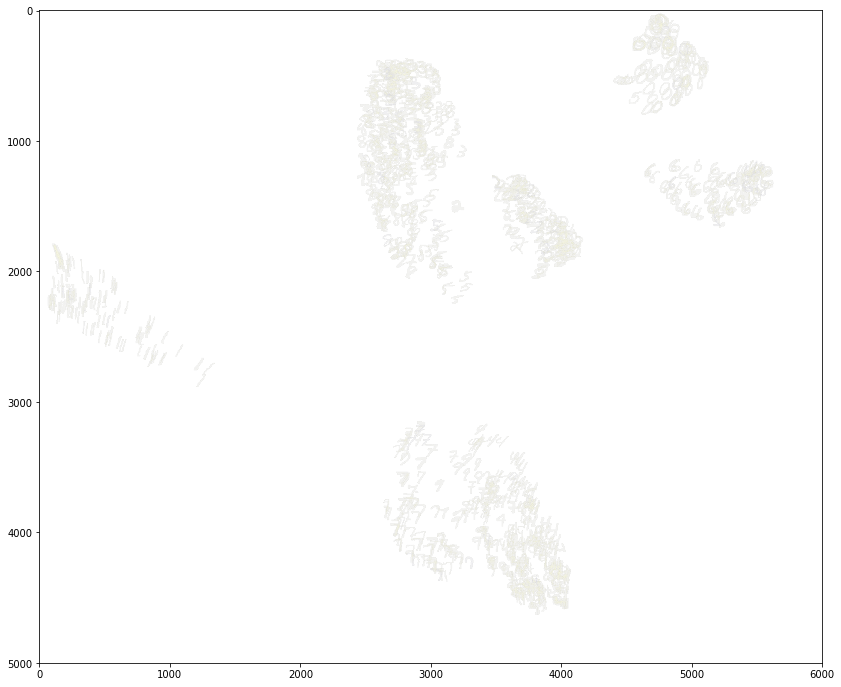

In [87]:
width = 6000
height = 5000
max_dim = 500

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(x_test_f1, tx1, ty1):
    tile = Image.fromarray(img,'RGBA')
    rs = max(0.2, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

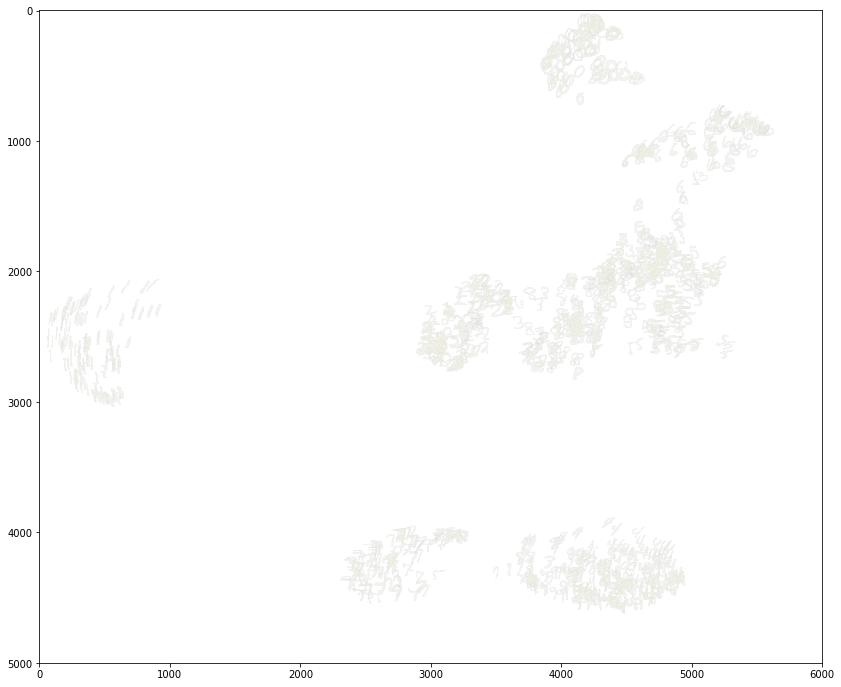

In [100]:
width = 6000
height = 5000
max_dim = 500

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(x_test_f1, tx1, ty1):
    tile = Image.fromarray(img,'RGBA')
    rs = max(0.2, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

In [101]:
full_image.save('./piezoresponse_autoencoder/MODEL_without_attention.bmp')

In [70]:
# sets the plotting format
plot_format = {
    # adds scalebar to image
    'add_scalebar': True,
    # sets the dimensions for the scalebar [(size of image),(size of scalebar)]
    'scalebar': [2000, 500],
    # selects if the image will be rotated
    'rotation': False,
    # selects the rotation angle of the image
    'angle': 60.46,
    # sets the fraction of the image to crop
    'frac_rm': 0.17765042979942694,
    # sets the resolution of the image
    'dpi': 300,
    # sets the default colormap
    'color_map': 'viridis',
    # sets if color bars should be added
    'color_bars': True}

In [81]:
cd Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks/

/Users/qinshuyu/497_MAT_Assignment/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks


In [82]:
piezoresponse_model = load_model('conv1d_resnet_new_6500')

lstm_model:24
conv1d_model:93

In [65]:
data_3d = np.load('flake_data.npy')

In [66]:
data_3d.shape

(2704, 1600, 1)

In [83]:
# Computes the low dimensional layer
piezoresponse_embeddings = rnn.get_activations(piezoresponse_model,
                                               data_3d,
                                               93)

In [68]:
activation = rnn.get_ith_layer_output(piezoresponse_model, data_3d, 93)

In [85]:
# Sets what object to export
printing = {  # exports eps vector graphics (note these files can be large)
    'EPS': False,
    # exports png files
    'PNG': True,
    # prints image series (note this can take some time)
    'all_figures': False,
    # generates movies (note this can take some time)
    'movies': False,
    # resolution of the images
    'dpi': 300}

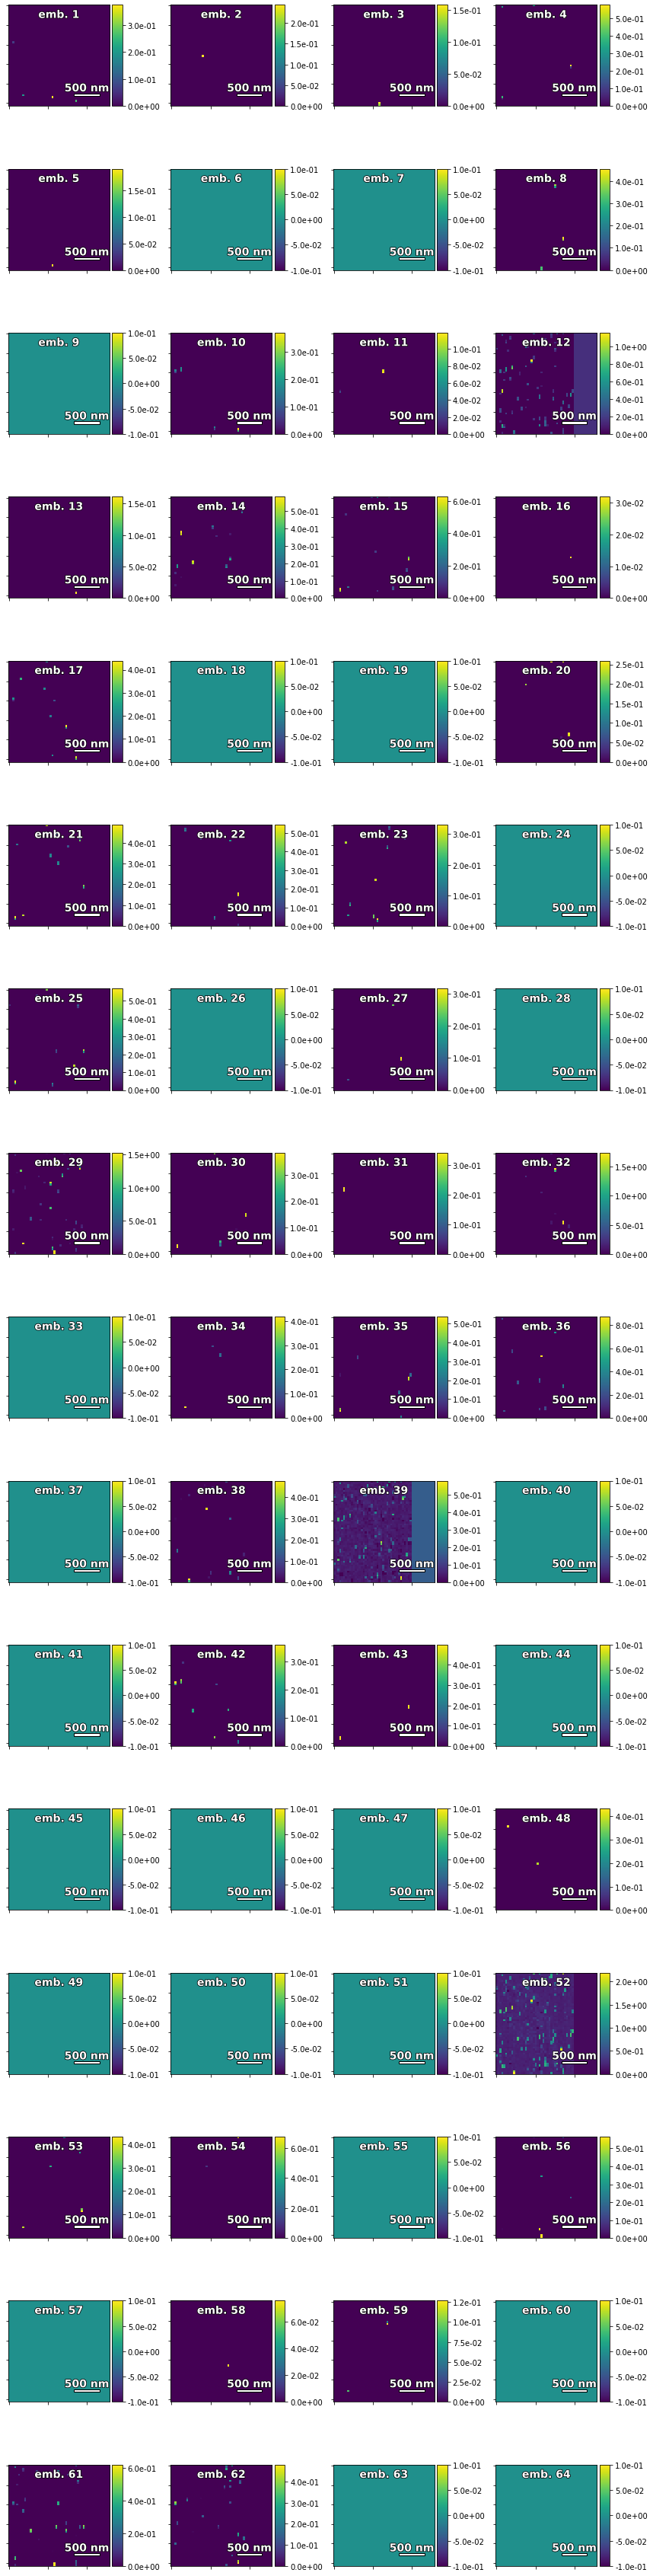

In [86]:
# plots the embedding maps
_ = viz.plot.embedding_maps(piezoresponse_embeddings,
                            printing,
                            plot_format,
                            folder_piezoresponse_autoencoder,
                            filename='./renset_conv1d_new_6500')

In [91]:
piezoresponse_embeddings.shape

(3600, 16)

In [92]:
activation.shape

(3600, 16)

In [31]:
y_train.shape

(60000,)

In [ ]:
_ = viz.plot.embedding_maps(piezoresponse_embeddings,
                            printing,
                            plot_format,
                            folder_piezoresponse_autoencoder,
                            filename='./resnet_jagar_data_16_15000epoch1')

In [48]:
cd ..

/Users/qinshuyu/497_MAT_Assignment


In [49]:
nwefile = np.('TaS2_flake1_81K_532nmRS_Res2X (50x_0.3mW_2s).mat')

AttributeError: module 'numpy' has no attribute 'open'

In [50]:
from scipy.io import loadmat
x = loadmat('TaS2_flake1_81K_532nmRS_Res2X (50x_0.3mW_2s).mat')

In [61]:
y = x

KeyError: 6

In [58]:
y

array({'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Oct 08 11:18:03 2019', '__version__': '1.0', '__globals__': [], 'nS1_a1map2TaS2_81K_532nmRS_grade1800_Res2X_100x_03mW_2s': MatlabObject([[(array(['nS1_a1map2-TaS2_81K_532nmRS_grade1800_Res2X (100x_0.3mW_2s)'],
      dtype='<U59'), array(['image'], dtype='<U5'), array([], dtype='<U1'), array([[2019.,   10.,    8.,   11.,   18.,    3.]]), array([[2019.,   10.,    8.,   11.,   18.,    3.]]), array([[52, 52]], dtype=uint8), array([[1]], dtype=uint8), array([[1407., 1409., 1403., ..., 1394., 1399., 1396.],
       [1411., 1411., 1404., ..., 1395., 1404., 1402.],
       [1410., 1412., 1406., ..., 1402., 1402., 1393.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]], dtype=float32), array([[array([], dtype='<U1'), array([], dtype='<U1')],
       [array([], dtype='<U1'), array([], dtype='<

In [59]:
Vbot = np.linspace(-15, 15, 96)
Vtop = np.linspace(-15, 15, 96)
Fx = []
Fy = []

for k in range(100000):
    a1 = np.random.uniform(-6, -4, 2)
    a2 = np.random.uniform(2, 4, 2)
    a3 = np.random.uniform(11, 13, 2)
    a4 = np.random.uniform(14, 16, 2)
    a5 = np.random.uniform(1, 3, 2)
    a6 = np.random.uniform(9, 11, 2)
    a7 = np.random.uniform(0, 1, 2)
    b1 = np.random.uniform(1, 1, 2)
    b2 = np.random.uniform(1, 1, 2)
    b3 = np.random.uniform(1, 1, 2)
    b4 = np.random.uniform(1, 1, 2)
    b5 = np.random.uniform(1, 1, 2)
    b6 = np.random.uniform(1, 1, 2)
    b7 = np.random.uniform(1, 1, 2)
    b8 = np.random.uniform(1, 1, 2)
    b9 = np.random.uniform(1, 1, 2)
    b10 = np.random.uniform(1, 1, 2)
    b11 = np.random.uniform(1, 1, 2)
    b12 = np.random.uniform(1, 1, 2)
    Al1 = np.random.uniform(2, 4, 2)
    Al2 = np.random.uniform(-3, -1, 2)
    Al3 = np.random.uniform(-7, -5, 2)
    Au1 = np.random.uniform(-9, -7, 2)
    Au2 = np.random.uniform(-5, -3, 2)
    Au3 = np.random.uniform(-1, 1, 2)
    C1 = np.random.uniform(-2, 0, 2)
    C2 = np.random.uniform(-2, 0, 2)
    C3 = np.random.uniform(-2, 0, 2)
    C4 = np.random.uniform(5, 7, 2)
    C5 = np.random.uniform(5, 7, 2)
    C6 = np.random.uniform(5, 7, 2)
    D1 = np.random.uniform(0, 2, 2)
    D2 = np.random.uniform(0, 2, 2)
    D3 = np.random.uniform(0, 2, 2)
    D4 = np.random.uniform(0, 2, 2)
    D5 = np.random.uniform(0, 2, 2)
    D6 = np.random.uniform(0, 2, 2)

    s1 = s_1(b1[0], b2[0], Vbot, C1[0], D1[0])
    s2 = s_2(b3[0], b4[0], Vbot, C2[0], D2[0])
    s3 = s_3(b5[0], b6[0], Vbot, C3[0], D3[0])
    s4 = s_4(b7[0], b8[0], Vtop, C4[0], D4[0])
    s5 = s_5(b9[0], b10[0], Vtop, C5[0], D5[0])
    s6 = s_6(b11[0], b12[0], Vtop, C6[0], D6[0])

    s11 = s_1(b1[1], b2[1], Vbot, C1[1], D1[1])
    s21 = s_2(b3[1], b4[1], Vbot, C2[1], D2[1])
    s31 = s_3(b5[1], b6[1], Vbot, C3[1], D3[1])
    s41 = s_4(b7[1], b8[1], Vtop, C4[1], D4[1])
    s51 = s_5(b9[1], b10[1], Vtop, C5[1], D5[1])
    s61 = s_6(b11[1], b12[1], Vtop, C6[1], D6[1])

    F1 = F_1(a1[0], a2[0], a3[0], a4[0], a7[0], Al1[0], Al2[0], Al3[0], s1, s2, s3, Vbot)
    F2 = F_2(a1[0], a5[0], a6[0], a4[0], a7[0], Au1[0], Au2[0], Au3[0], s4, s5, s6, Vtop)

    F11 = F_1(a1[1], a2[1], a3[1], a4[1], a7[1], Al1[1], Al2[1], Al3[1], s11, s21, s31, Vbot)
    F21 = F_2(a1[1], a5[1], a6[1], a4[1], a7[1], Au1[1], Au2[1], Au3[1], s41, s51, s61, Vtop)

    F1 = np.asarray(F1)
    F2 = np.asarray(F2)
    F4 = F2[0:48]
    F3 = F2[48:96]
    F5 = np.flip(F1)
    Fx_ = np.concatenate((F3, F5, F4), axis=None)
    Fx.append(Fx_)

    F11 = np.asarray(F11)
    F21 = np.asarray(F21)
    F41 = F21[0:48]
    F31 = F21[48:96]
    F51 = np.flip(F11)
    Fy_ = np.concatenate((F31, F51, F41), axis=None)
    Fy.append(Fy_)

Fx = preprocessing.normalize(Fx)
Fx = np.asarray(Fx)
Fy = preprocessing.normalize(Fy)
Fy = np.asarray(Fy)

Fx_3d = np.atleast_3d(Fx)
Fy_3d = np.atleast_3d(Fy)

NameError: name 's_1' is not defined

In [70]:
Vbot = np.linspace(-15, 15, 96)
Vtop = np.linspace(-15, 15, 96)
Fx = []
Fy = []

for k in range(1000):
    a1 = np.random.uniform(-6, -4, 2)
    a2 = np.random.uniform(2, 4, 2)
    a3 = np.random.uniform(11, 13, 2)
    a4 = np.random.uniform(14, 16, 2)
    a5 = np.random.uniform(1, 3, 2)
    a6 = np.random.uniform(9, 11, 2)
    a7 = np.random.uniform(0, 1, 2)
    b1 = np.random.uniform(0, 2, 2)
    b2 = np.random.uniform(4, 6, 2)
    b3 = np.random.uniform(0, 2, 2)
    b4 = np.random.uniform(4, 6, 2)
    b5 = np.random.uniform(0, 2, 2)
    b6 = np.random.uniform(4, 6, 2)
    b7 = np.random.uniform(0, 2, 2)
    b8 = np.random.uniform(4, 6, 2)
    b9 = np.random.uniform(0, 2, 2)
    b10 = np.random.uniform(4, 6, 2)
    b11 = np.random.uniform(0, 2, 2)
    b12 = np.random.uniform(4, 6, 2)
    Al1 = np.random.uniform(2, 4, 2)
    Al2 = np.random.uniform(-3, -1, 2)
    Al3 = np.random.uniform(-7, -5, 2)
    Au1 = np.random.uniform(-9, -7, 2)
    Au2 = np.random.uniform(-5, -3, 2)
    Au3 = np.random.uniform(-1, 1, 2)
    C1 = np.random.uniform(-2, 0, 2)
    C2 = np.random.uniform(-2, 0, 2)
    C3 = np.random.uniform(-2, 0, 2)
    C4 = np.random.uniform(5, 7, 2)
    C5 = np.random.uniform(5, 7, 2)
    C6 = np.random.uniform(5, 7, 2)
    D1 = np.random.uniform(0, 2, 2)
    D2 = np.random.uniform(0, 2, 2)
    D3 = np.random.uniform(0, 2, 2)
    D4 = np.random.uniform(0, 2, 2)
    D5 = np.random.uniform(0, 2, 2)
    D6 = np.random.uniform(0, 2, 2)
    x = np.random.randint(2)
    y = np.random.randint(2)
    m = np.random.randint(2)
    n = np.random.randint(2)
    s1 = s_1(b1[0], b2[0], Vbot, C1[0], D1[0])
    s2 = s_2(b3[0], b4[0], Vbot, C2[0], D2[0])
    s3 = s_3(b5[0], b6[0], Vbot, C3[0], D3[0])
    s4 = s_4(b7[0], b8[0], Vtop, C4[0], D4[0])
    s5 = s_5(b9[0], b10[0], Vtop, C5[0], D5[0])
    s6 = s_6(b11[0], b12[0], Vtop, C6[0], D6[0])

    s11 = s_1(b1[1], b2[1], Vbot, C1[1], D1[1])
    s21 = s_2(b3[1], b4[1], Vbot, C2[1], D2[1])
    s31 = s_3(b5[1], b6[1], Vbot, C3[1], D3[1])
    s41 = s_4(b7[1], b8[1], Vtop, C4[1], D4[1])
    s51 = s_5(b9[1], b10[1], Vtop, C5[1], D5[1])
    s61 = s_6(b11[1], b12[1], Vtop, C6[1], D6[1])

    F1 = F_1(a1[0], a2[0], a3[0], a4[0], a7[0], Al1[0], Al2[0], Al3[0], s1, s2, s3, Vbot, x, y)
    F2 = F_2(a1[0], a5[0], a6[0], a4[0], a7[0], Au1[0], Au2[0], Au3[0], s4, s5, s6, Vtop, x, y)

    F11 = F_1(a1[1], a2[1], a3[1], a4[1], a7[1], Al1[1], Al2[1], Al3[1], s11, s21, s31, Vbot, m, n)
    F21 = F_2(a1[1], a5[1], a6[1], a4[1], a7[1], Au1[1], Au2[1], Au3[1], s41, s51, s61, Vtop, m, n)

    F1 = np.asarray(F1)
    F2 = np.asarray(F2)
    F4 = F2[0:48]
    F3 = F2[48:96]
    F5 = np.flip(F1)
    Fx_ = np.concatenate((F3, F5, F4), axis=None)
    Fx.append(Fx_)

    F11 = np.asarray(F11)
    F21 = np.asarray(F21)
    F41 = F21[0:48]
    F31 = F21[48:96]
    F51 = np.flip(F11)
    Fy_ = np.concatenate((F31, F51, F41), axis=None)
    Fy.append(Fy_)

Fx = preprocessing.normalize(Fx)
Fx = np.asarray(Fx)
Fy = preprocessing.normalize(Fy)
Fy = np.asarray(Fy)

Fx_3d = np.atleast_3d(Fx)
Fy_3d = np.atleast_3d(Fy)

In [71]:
new_model = load_model('resnet_pie_embedding_size128')

In [72]:
result = new_model.predict(Fx_3d)

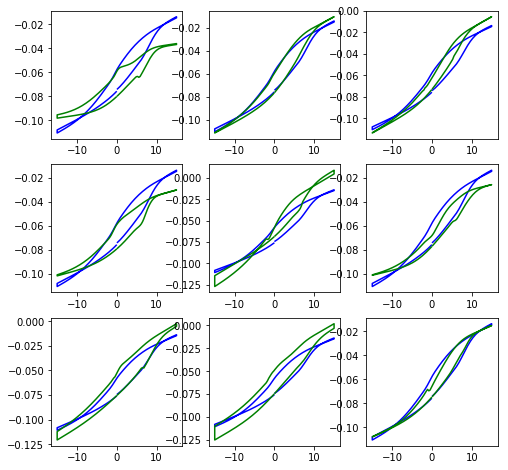

In [77]:
f_y5 = Fx_3d
f_y6 = Fy_3d
f_fit = result
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
axs.reshape(-1)
for i in range (0,3):
    for j in range(0,3):
        k = np.random.randint(0, f_y5.shape[0])
        ax = axs[i,j]
        #ax.plot(f_y5[k],'r-')
        ax.plot(reshape_loop(Vbot,Vtop),f_fit[k],'b-')
        ax.plot(reshape_loop(Vbot,Vtop),f_y6[k],'g-')

(array([ 89.,  36.,  81., 766., 210., 251., 284., 257., 199., 155., 102.,
         71.,  38.,  32.,  18.,  12.,   8.,   7.,   6.,   5.,   2.,   1.,
          1.,   0.,   2.,   3.,   1.,   3.,   3.,   3.,   2.,   6.,   2.,
          4.,   2.,   0.,   2.,   3.,   6.,   4.,   2.,   3.,   3.,   1.,
          2.,   1.,   2.,   2.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,
          2.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.        , 0.00674784, 0.01349568, 0.02024352, 0.02699136,
        0.03373919, 0.04048703, 0.04723487, 0.05398271, 0.06073055,
        0.06747839, 0.07422623, 0.08097406, 0.08772191, 0.09446974,
        0.10121758, 0.10796542, 0.11471326, 0.1214611 , 0.12820894,
        0.13495678, 0.14170462, 0.14845246, 0.

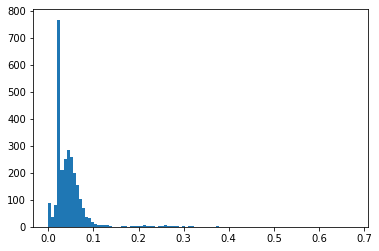

In [78]:
plt.hist(piezoresponse_embeddings[:,61].reshape(-1),100)


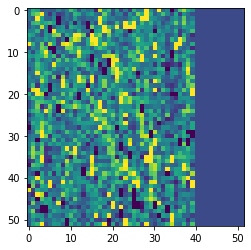

In [79]:
plt.imshow(piezoresponse_embeddings[:,61].reshape(52,52))
plt.clim(0,.1)

In [90]:
ls

Combined_Function.ipynb
Conv_1D_ResNet-Copy1.ipynb
Final_Paper.ipynb
KerasOneCycle/
One_cycle.ipynb
README.md
Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks/
TaS2_flake1_81K_532nmRS_Res2X (50x_0.3mW_2s).mat
Test_Paper_Data.ipynb
Transformer/
abdc.tif
add_new_programs.ipynb
attention_lynn.ipynb
auto_test
cho.txt
encoder-decoder-rnn.png
flake_data.npy
function1.png
function2.png
iyer.txt
k-means.ipynb
keras-one-cycle/
linear-regression.png
lstm-rnn.png
math.ipynb
newtry.ipynb
piezoresponse_function.ipynb
pytorch_model.ipynb
resnet_try
rnn_pytorch.jpg
toy_model.ipynb
transfer_Qin's_Cppy.ipynb
transfer_function-Copy1.ipynb
transfer_function.ipynb
use_attention_layer.ipynb
utils/
voltage.npy


In [101]:
from PIL import Image

In [102]:
im = Image.open('19920612_AVIRIS_IndianPine_EW-line_R.tif')
im.show()

OSError: cannot identify image file '19920612_AVIRIS_IndianPine_EW-line_R.tif'

In [ ]:
numpy.array(im)

In [103]:
from libtiff import TIFF

Generating '/Users/qinshuyu/opt/anaconda3/lib/python3.7/site-packages/libtiff/tiff_h_4_0_10.py' from '/Users/qinshuyu/opt/anaconda3/bin/../lib/../include/tiff.h'


In [156]:
tif = TIFF.open('19920612_AVIRIS_IndianPine_NS-line.tif', mode='r')

In [115]:
image1 = tif.read_image()

In [116]:
image1.shape

(191, 1280, 307)

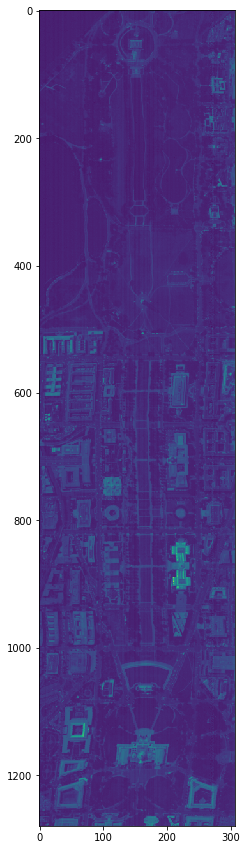

In [137]:
plt.figure(figsize=(20,15))
plt.imshow(image1[0])

In [157]:
image2 = tif.read_image()

In [159]:
image2.shape

(220, 2678, 614)

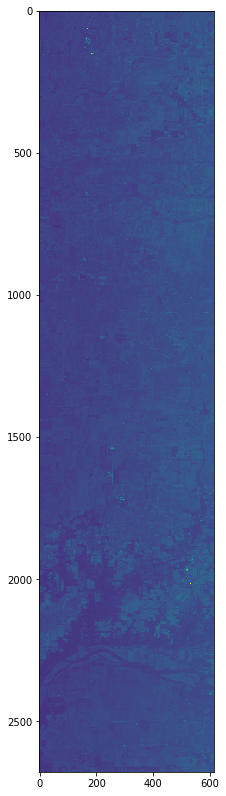

In [162]:
n = 5
plt.figure(figsize=(30, 14))
plt.imshow(image2[4])